In [1]:
#Need this location for rest of the project to be located from
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\bigmart_sales')

In [2]:
#Load the libraries from package 'bigmart_sales/__init__.py file under the location mentioned above'
#from bigmart_sales  import * #import the package 'bigmart_sales under the path mentioned above'
from bigmart_sales import * 
from bigmart_sales.config import *
from utils import *
from utils.utils_ import *
from utils.utils_local import *

In [3]:
#dataframes
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)
#concat train  and test data.
full_data = [train_df, test_df] #TO be used for cleaning purposes

In [4]:
#check the shape of dataframe
test_df.shape

(5681, 11)

In [5]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


## See the summary of columns

In [6]:
#train_df.info()
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
continous_names, cat_names, iv,dv,testparams = iv_dv_get_col_names(train_df,'Item_Outlet_Sales')
print('continous :',continous_names, '\ncategorical :',cat_names)

$$ adding Item_Identifier(object) as categorical
$$ adding Item_Weight(float64) as continous
$$ adding Item_Fat_Content(object) as categorical
$$ adding Item_Visibility(float64) as continous
$$ adding Item_Type(object) as categorical
$$ adding Item_MRP(float64) as continous
$$ adding Outlet_Identifier(object) as categorical
************************you may need to define this col - Outlet_Establishment_Year in categ variable
******* adding Outlet_Establishment_Year(int64) as continous as per the data type
$$ adding Outlet_Size(object) as categorical
$$ adding Outlet_Location_Type(object) as categorical
$$ adding Outlet_Type(object) as categorical
$$ adding Item_Outlet_Sales(float64) as continous
continous : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'] 
categorical : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [8]:
# change the dat type
train_df.Outlet_Establishment_Year = train_df.Outlet_Establishment_Year.astype(object)

continous_names.remove('Outlet_Establishment_Year')
cat_names.append('Outlet_Establishment_Year')

## Missing value analysis
Acceptable missing values percentage is below 30%. any field beying that threshold can be dropped

In [9]:
#get the rows with null values
missing_values = pd.DataFrame(train_df.isnull().sum())
#rename the columns old value: 0, new_value:'missing_per'
missing_values = missing_values.rename(columns = {'index':'variable', 0:'missing_per'})
missing_values['missing_per'] = (missing_values['missing_per']/len(train_df))*100
missing_values

,missing_per
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


## Missing value Imputation

### frame df_cleaned(drop na)

In [10]:
# drop these
df_cleaned = train_df.drop(train_df[(train_df.Outlet_Size.isnull())|(train_df.Item_Weight.isnull())].index).reset_index().drop('index',axis=1)
#df_cleaned = train_df.drop(train_df[train_df.Item_Outlet_Sales<3000].index).reset_index().drop('index',axis=1)
#df_cleaned.Outlet_Establishment_Year = df_cleaned.Outlet_Establishment_Year.astype(object)

## Investigate

In [11]:
df_slice = train_df[(train_df.Outlet_Size.isnull())|(train_df.Item_Weight.isnull())]


In [12]:
#df_slice.groupby(['Item_Identifier'])['Item_Outlet_Sales'].mean()
#df_slice[df_slice.Item_Outlet_Sales>3000]

(0.07397484924080341, -1.2389883455158937, 12.15, count    4650.000000
 mean       12.898675
 std         4.670973
 min         4.555000
 25%         8.770000
 50%        12.650000
 75%        17.000000
 max        21.350000
 Name: Item_Weight, dtype: float64)

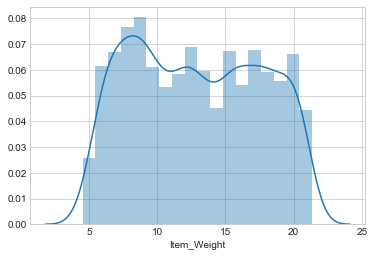

In [13]:
sb.distplot(train_df.dropna().Item_Weight)
skew(train_df.dropna().Item_Weight),kurtosis(train_df.dropna().Item_Weight),train_df.dropna().Item_Weight.mode()[0],\
train_df.dropna().Item_Weight.describe()

#### weight is not skewed, so we can use mean as well as median , the are very close

In [14]:
# Impute the MV
for i,dataset in enumerate([train_df,df_cleaned,test_df]):
    dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].median())
    dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0]) #categorical variable, use mode
    
train_df.isnull().sum(),test_df.isnull().sum()

(Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 dtype: int64, Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 dtype: int64)

## outlier analysis

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
Item_Weight
Item_Visibility
Item_MRP
Item_Outlet_Sales


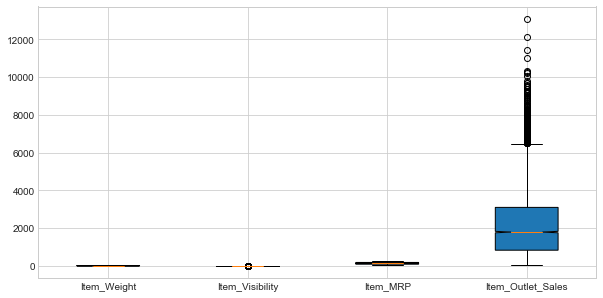

In [15]:
f,ax=plt.subplots(figsize=(10,5))
plot = []
print(continous_names)
for i in continous_names:
    #plt.boxplot(train_df.iloc[:,i])
    print(i)
    plot.append(list(train_df.loc[:,i]))
#plot = [list(train_df.loc[:,'Item_Weight']), list(train_df.loc[:,'Item_MRP'])]
plt.boxplot(plot, notch = 'True', patch_artist= True, labels=continous_names)
plt.show()

In [16]:
from pprint import pprint
# Just get the oulier info
outlier = {}
print(continous_names)
print('\n------> train')
outlier,train_df= get_outliers(train_df,continous_names,outliers_=outlier,drop=False)
pprint(outlier)

print('\n------->In test')
outlier={}
outlier,test_df= get_outliers(test_df,[i for i in continous_names if i not in ['Item_Outlet_Sales']],\
                                     outliers_=outlier,drop=False)
full_data = [train_df,test_df]
pprint(outlier)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

------> train
-----values below -0.7249999999999996 and above 26.035 suggested to drop for col Item_Weight:
-----values below -0.07440424500000001 and above 0.195979015 suggested to drop for col Item_Visibility:
-----values below -43.8993 and above 323.3695 suggested to drop for col Item_MRP:
-----values below -2566.3261 and above 6501.8699 suggested to drop for col Item_Outlet_Sales:
{'Item_MRP': ['per outliers above max for Item_MRP is 0.0',
              'per outliers below min for Item_MRP is 0.0'],
 'Item_Outlet_Sales': ['per outliers above max for Item_Outlet_Sales is '
                       '2.1823301654347063',
                       'per outliers below min for Item_Outlet_Sales is 0.0'],
 'Item_Visibility': ['per outliers above max for Item_Visibility is '
                     '1.689545934530095',
                     'per outliers below min for Item_Visibility is 0.0'],
 'Item_Weight': ['per outliers above 

In [17]:
# Just get the oulier info
outlier = {}
print(continous_names)
print('\n------> train')
outlier,train_df= get_outliers(train_df,continous_names,outliers_=outlier,drop=True)
pprint(outlier)

print('\n------->In test')
outlier={}
outlier,test_df= get_outliers(test_df,[i for i in continous_names if i not in ['Item_Outlet_Sales']],\
                                     outliers_=outlier,drop=True)
full_data = [train_df,test_df]
pprint(outlier)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

------> train
-----values below -0.7249999999999996 and above 26.035 dropped  for col Item_Weight:
-----values below -0.07440424500000001 and above 0.195979015 dropped  for col Item_Visibility:
-----values below -43.950700000000026 and above 323.3709 dropped  for col Item_MRP:
-----values below -2499.7460999999994 and above 6499.2067 dropped  for col Item_Outlet_Sales:
{'Item_MRP': ['per outliers above max for Item_MRP is 0.0',
              'per outliers below min for Item_MRP is 0.0'],
 'Item_Outlet_Sales': ['per outliers above max for Item_Outlet_Sales is '
                       '2.2198353025420694',
                       'per outliers below min for Item_Outlet_Sales is 0.0'],
 'Item_Visibility': ['per outliers above max for Item_Visibility is '
                     '1.689545934530095',
                     'per outliers below min for Item_Visibility is 0.0'],
 'Item_Weight': ['per outliers above max for Item_Wei

In [18]:
outlier = {}
print(continous_names)
print('\n------> train')
outlier,df_cleaned= get_outliers(df_cleaned,continous_names,outliers_=outlier,drop=True)
pprint(outlier)


['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

------> train
-----values below -3.575000000000001 and above 29.345 dropped  for col Item_Weight:
-----values below -0.06818374362499999 and above 0.18288729137499998 dropped  for col Item_Visibility:
-----values below -43.37309999999998 and above 324.6065 dropped  for col Item_MRP:
-----values below -1854.41945 and above 6091.23775 dropped  for col Item_Outlet_Sales:
{'Item_MRP': ['per outliers above max for Item_MRP is 0.0',
              'per outliers below min for Item_MRP is 0.0'],
 'Item_Outlet_Sales': ['per outliers above max for Item_Outlet_Sales is '
                       '2.012115967113804',
                       'per outliers below min for Item_Outlet_Sales is 0.0'],
 'Item_Visibility': ['per outliers above max for Item_Visibility is '
                     '0.6021505376344086',
                     'per outliers below min for Item_Visibility is 0.0'],
 'Item_Weight': ['per outliers above max for Item_Weig

## Let us see the correlation

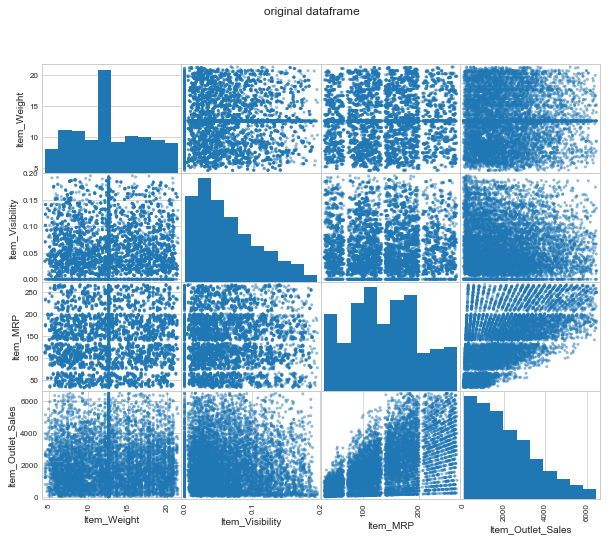

In [19]:
#from pandas.plotting import scatter_matrix
scatter_matrix(train_df,figsize=(10,8))
plt.suptitle('original dataframe')
plt.show()

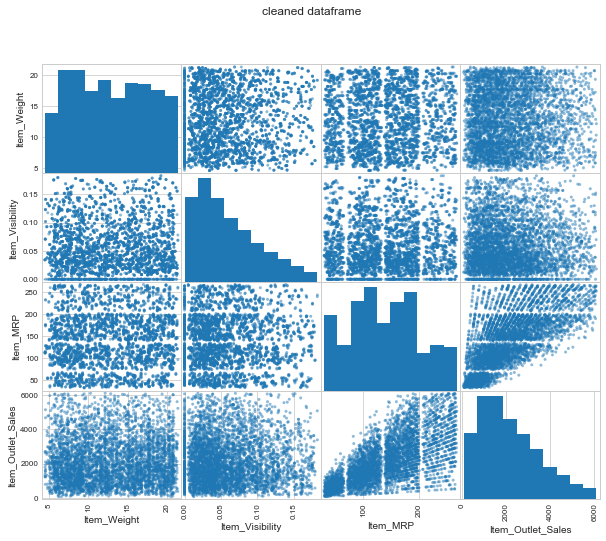

In [20]:
scatter_matrix(df_cleaned,figsize=(10,8))
plt.suptitle('cleaned dataframe')
plt.show()

Text(0.5, 1.0, 'cleaned dataframe')

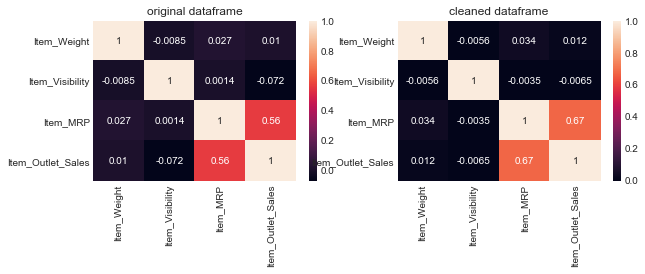

In [21]:
f,ax=plt.subplots(figsize=(10,10))
pltno=321
plt.subplot(pltno)
cor = train_df[continous_names].corr()
#abs(cor['Item_Outlet_Sales']).nlargest(5)
sb.heatmap(cor,annot=True)
plt.title('original dataframe')

pltno=322
plt.subplot(pltno)
cor = df_cleaned[continous_names].corr()
#abs(cor['Item_Outlet_Sales']).nlargest(5)
sb.heatmap(cor,annot=True)
plt.title('cleaned dataframe')

#### Item_Outlet_Sales value is increasing with increase in mrp(more the mrp of the product, more the sale value of outlet)
- Item_Weight is moving in same direction as Sale price
- Negative corelation b/w visibilty and sale price
- - correlation for all predictors except Item_Visibility have increased in cleaned dataframe

In [22]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# categorical variables analysis

train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()

In [23]:
cat_names

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Outlet_Establishment_Year']

### Outlet_type and sales

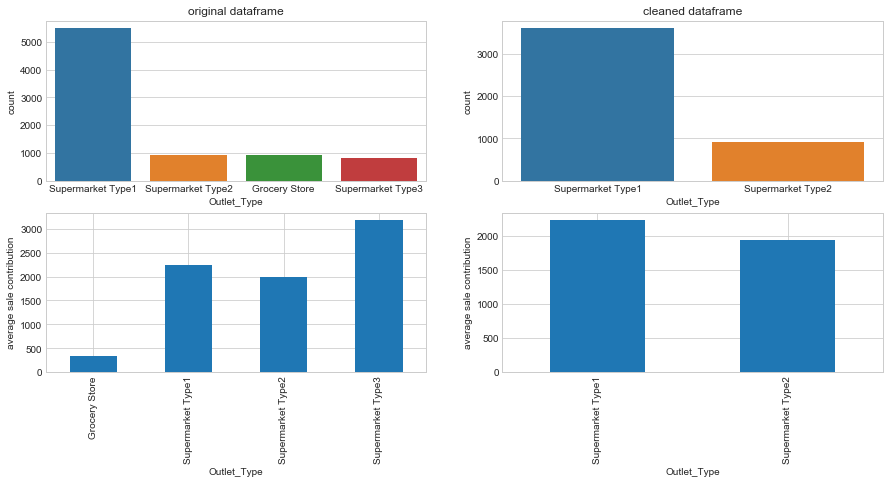

In [24]:
f,ax=plt.subplots(figsize=(15,10))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.Outlet_Type)
plt.title('original dataframe')

pltno=322
plt.subplot(pltno)
sb.countplot(df_cleaned.Outlet_Type)
plt.title('cleaned dataframe')

pltno=323
plt.subplot(pltno)
#train_df[train_df.Item_Outlet_Sales<2000].Outlet_Type.value_counts()
train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()
#plt.title('original dataframe')
plt.ylabel('average sale contribution')

pltno=324
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()
#plt.title('cleaned dataframe')
plt.ylabel('average sale contribution')
plt.show()

#### cleaned vs original
- Both datsets have Super Market Type 1 as the maximum occuring type for outlet_Type
- Cleaned dataframe has only two Outlet_Types, out of which Super Market Type 1 makes more significant contribution towards outlet sales than Super Market Type 2
- Original dataframe states Super Market Type 3 contributing more, followed by Super Market Type 1 
    -  Question is what are the characteristics of SuperMarket type 1 and 3, which is driving more average sale ??

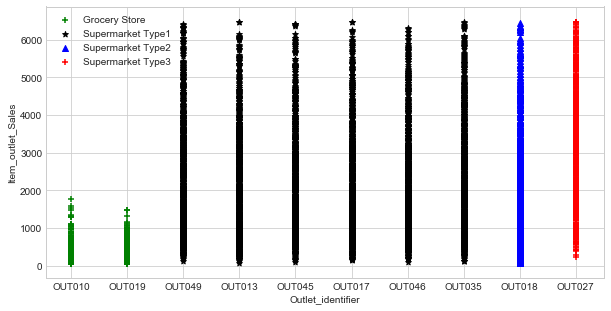

In [25]:
f,ax=plt.subplots(figsize=(10,5))
df0 = train_df[train_df['Outlet_Type'] == 'Grocery Store']
df1 = train_df[train_df['Outlet_Type'] == 'Supermarket Type1']
df2 = train_df[train_df['Outlet_Type'] == 'Supermarket Type2']
df3 = train_df[train_df['Outlet_Type'] == 'Supermarket Type3']


plt.scatter(df0['Outlet_Identifier'],df0['Item_Outlet_Sales'],marker='+',color='green',label = 'Grocery Store')
plt.scatter(df1['Outlet_Identifier'],df1['Item_Outlet_Sales'],marker='*',color='black',label = 'Supermarket Type1')
plt.scatter(df2['Outlet_Identifier'],df2['Item_Outlet_Sales'],marker='^',color='blue',label = 'Supermarket Type2')
plt.scatter(df3['Outlet_Identifier'],df3['Item_Outlet_Sales'],marker='+',color='red',label = 'Supermarket Type3')
plt.ylabel('Item_outlet_Sales')
plt.xlabel('Outlet_identifier')
plt.legend()

### Outlet_Identifier : Overall this is redundant column to keep
- we can derive the same information from the Outet_Type these identifiers belongs to
- Out027 makes the most sales, and it belongs to SuperMarket_Type3 which makes the most
	- Grocery Stores have OUT010,OUT019
	- Super Market Type 1 has OUT049, OUT013,OUT045,OUT017,OUT046,OUT035
	- Super Market Type 2 has only OUT018
	- Super Market Type 3 has only OUT027

count     939.000000
mean      339.433916
std       264.409857
min        33.290000
25%       151.802400
50%       254.335600
75%       457.404600
max      1775.688600
Name: Item_Outlet_Sales, dtype: float64


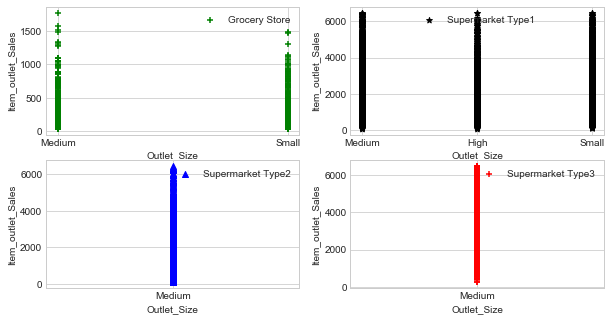

In [26]:
print(df0['Item_Outlet_Sales'].describe())
f,ax=plt.subplots(figsize=(10,8))
pltno=321
plt.subplot(pltno)
plt.scatter(df0['Outlet_Size'],df0['Item_Outlet_Sales'],marker='+',color='green',label = 'Grocery Store')
plt.ylabel('Item_outlet_Sales')
plt.xlabel('Outlet_Size')
plt.legend()

pltno=322
plt.subplot(pltno)
plt.scatter(df1['Outlet_Size'],df1['Item_Outlet_Sales'],marker='*',color='black',label = 'Supermarket Type1')
plt.ylabel('Item_outlet_Sales')
plt.xlabel('Outlet_Size')
plt.legend()

pltno=323
plt.subplot(pltno)
plt.scatter(df2['Outlet_Size'],df2['Item_Outlet_Sales'],marker='^',color='blue',label = 'Supermarket Type2')
plt.ylabel('Item_outlet_Sales')
plt.xlabel('Outlet_Size')
plt.legend()

pltno=324
plt.subplot(pltno)
plt.scatter(df3['Outlet_Size'],df3['Item_Outlet_Sales'],marker='+',color='red',label = 'Supermarket Type3')
plt.ylabel('Item_outlet_Sales')
plt.xlabel('Outlet_Size')
plt.legend()
plt.show()

#### Outlet_Size : No significance on sale contribution
- Grocery Stores,Super Market Type 1, Super Market Type 2 are having all 3 sizes small,medium and high and even the sale is ranging from 75 till 6k
- Super Market Type 3 is only medium sized stores

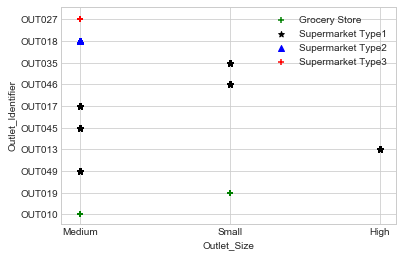

In [27]:
plt.scatter(df0['Outlet_Size'],df0['Outlet_Identifier'],marker='+',color='green',label = 'Grocery Store')
plt.scatter(df1['Outlet_Size'],df1['Outlet_Identifier'],marker='*',color='black',label = 'Supermarket Type1')
plt.scatter(df2['Outlet_Size'], df2['Outlet_Identifier'],marker='^',color='blue',label = 'Supermarket Type2')
plt.scatter(df3['Outlet_Size'], df3['Outlet_Identifier'],marker='+',color='red',label = 'Supermarket Type3')
plt.ylabel('Outlet_Identifier')
plt.xlabel('Outlet_Size')
plt.legend()

#### SuperMarket_Type3 (most sales contributor) is medium sized, followed by Type 1 which belongs to all 3 sizes
- Further suggests that sales contribution has nothing to do with Outlet_Identifier 

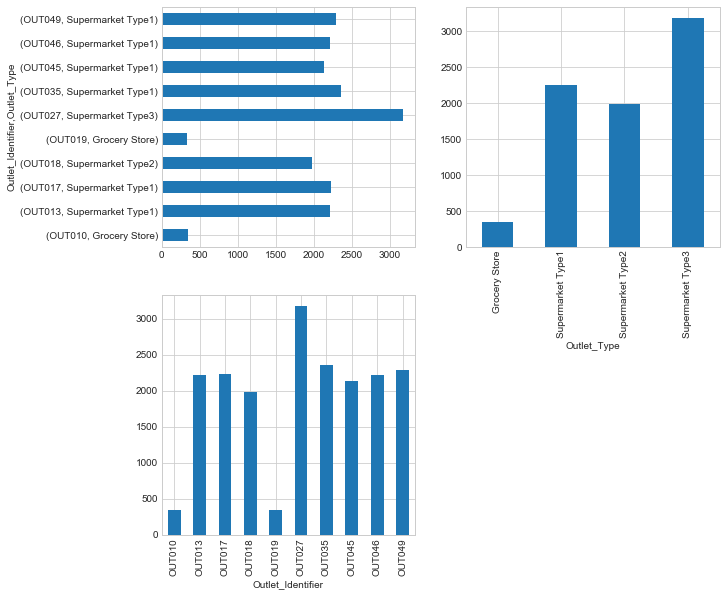

In [28]:
f,ax=plt.subplots(figsize=(10,15))
pltno=321
plt.subplot(pltno)
train_df.groupby(['Outlet_Identifier', 'Outlet_Type'])['Item_Outlet_Sales'].mean().plot.barh()
pltno=322
plt.subplot(pltno)
train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()
pltno=323
plt.subplot(pltno)
train_df.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].mean().plot.bar()

#### Outlet_Identifier is for sure redundant and will result in multi-collinearity issue and hence not to be included

### outlet_size and sales

Text(0.5, 1.0, 'Cleaned dataframe')

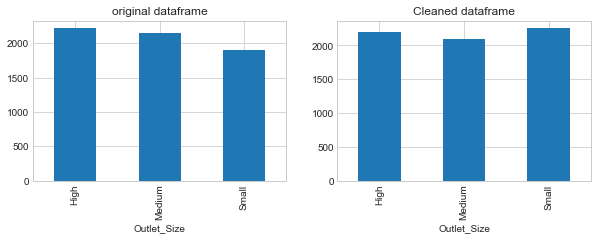

In [29]:
f,ax=plt.subplots(figsize=(10,10))
pltno=321
plt.subplot(pltno)
train_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()
plt.title('original dataframe')
pltno=322
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()
plt.title('Cleaned dataframe')

####  Outlet_Size and sale contribution
- original : High/large stores and mediuim are almost equal
- cleaned : small stores makes the most sales

In [30]:
#Let us maintain this info for later 
bar_graph_skip_list = ['Outlet_Identifier']

### Outlet_Location_Type and sales

Text(0, 0.5, 'average sales')

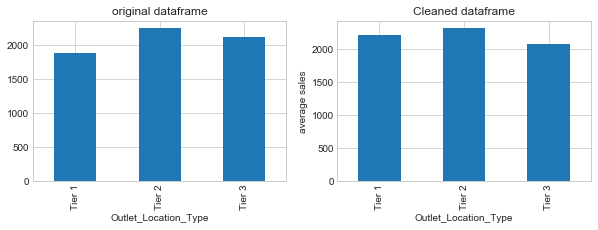

In [31]:
f,ax=plt.subplots(figsize=(10,10))
pltno=321
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
plt.title('original dataframe')
pltno=322
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
plt.title('Cleaned dataframe')
plt.ylabel('average sales')

#### Tier 2 recorded the highest sales


Outlet_Location_Type seems significant and tells tier-3 sale was the highest

Text(0.5, 0, 'Outlet_Size')

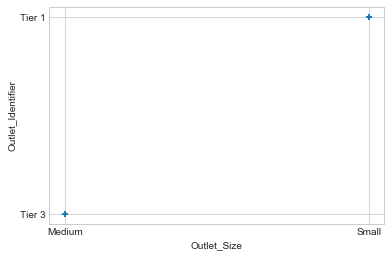

In [32]:
plt.scatter(df0['Outlet_Size'],df0['Outlet_Location_Type'],marker='+')

plt.ylabel('Outlet_Identifier')
plt.xlabel('Outlet_Size')


#### Tier-2 are small ones, tier-3 are both medium and high, so significant conclusion from just Outlet_Size alone

Text(0.5, 1.0, 'Cleaned dataframe')

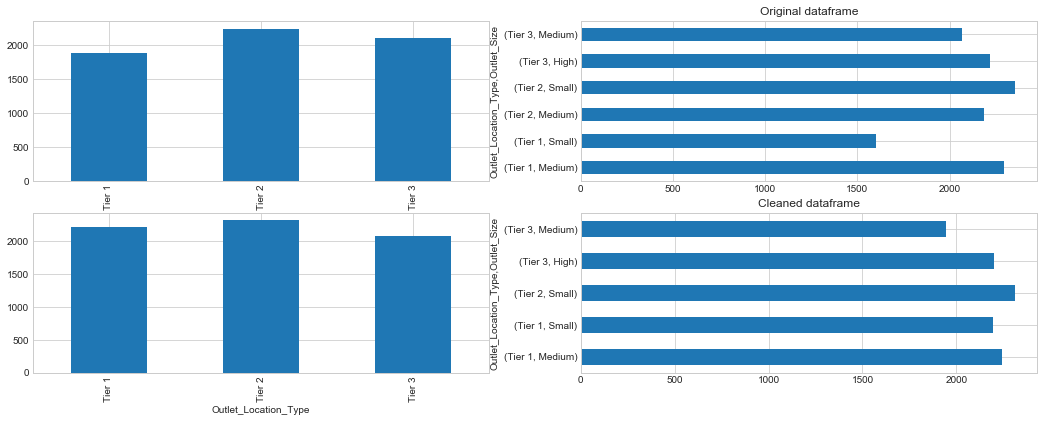

In [33]:
f,ax=plt.subplots(figsize=(18,10))
pltno=321
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
pltno=322
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().plot.barh()
plt.title('Original dataframe')

pltno=323
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
pltno=324
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].mean().plot.barh()
plt.title('Cleaned dataframe')

#### Outlet_Location_Type seems significant
- even small Tier 1 are making more sales than medium Tier 3
 - as per Outlet_Size -  High and medium makes most
 - as per Outlet_Location_Type - Tier-2 makes most which are actually small sized stores, because medium ones are distrubited among different tiers(2 and 3)
      - 

In [34]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


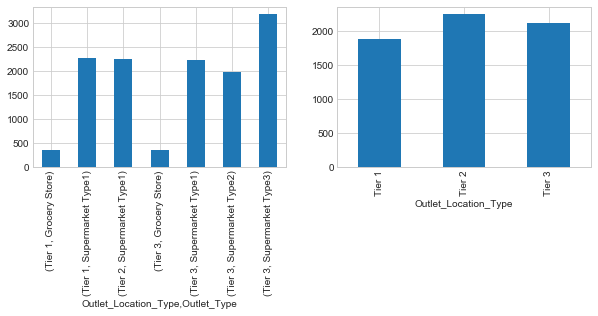

In [35]:
f,ax=plt.subplots(figsize=(10,10))
pltno=321
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean().plot.bar()
pltno=322
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()

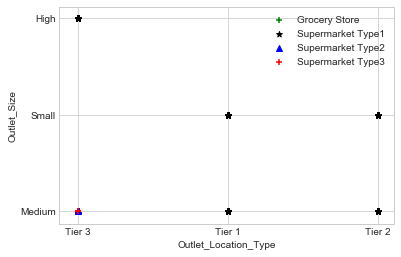

In [36]:
plt.scatter(df0['Outlet_Location_Type'],df0['Outlet_Size'],marker='+',color='green',label = 'Grocery Store')
plt.scatter(df1['Outlet_Location_Type'],df1['Outlet_Size'],marker='*',color='black',label = 'Supermarket Type1')
plt.scatter(df2['Outlet_Location_Type'],df2['Outlet_Size'],marker='^',color='blue',label = 'Supermarket Type2')
plt.scatter(df3['Outlet_Location_Type'],df3['Outlet_Size'],marker='+',color='red',label = 'Supermarket Type3')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Outlet_Size')
plt.legend()

#### Tier-1 location has small,med,high sized stores

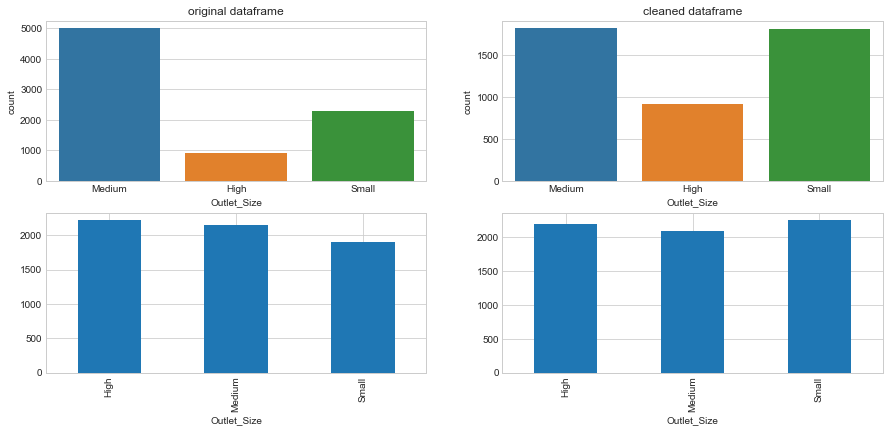

In [37]:
f,ax=plt.subplots(figsize=(15,10))
pltno=321
plt.subplot(pltno)
sb.countplot(train_df.Outlet_Size)
plt.title('original dataframe')

pltno=322
plt.subplot(pltno)
sb.countplot(df_cleaned.Outlet_Size)
plt.title('cleaned dataframe')

pltno=323
plt.subplot(pltno)
train_df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()
#plt.title('original dataframe')
pltno=324
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Size'])['Item_Outlet_Sales'].mean().plot.bar()
#plt.title('Cleaned dataframe')

####  contrast b/w origian and cleaned
    - original says high and medium sized make more than small ones
     - cleaned says that small makes the most 

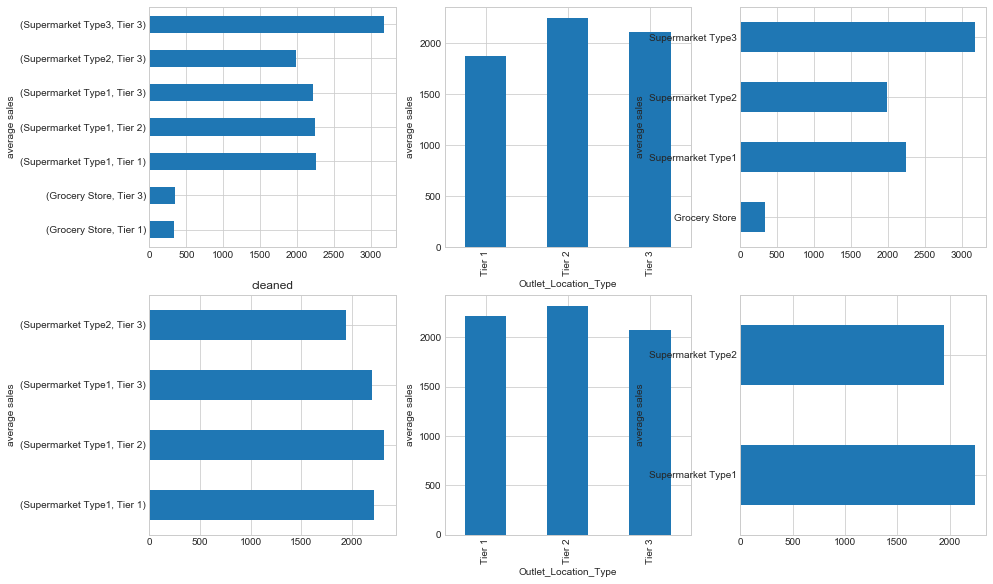

In [38]:
f,ax=plt.subplots(figsize=(15,15))
pltno=331
plt.subplot(pltno)
train_df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.barh()
plt.ylabel('average sales')

pltno=332
plt.subplot(pltno)
train_df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average sales')

pltno=333
plt.subplot(pltno)
train_df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.barh()
plt.ylabel('average sales')

pltno=334
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.barh()
plt.ylabel('average sales')
plt.title('cleaned')
pltno=335
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average sales')

pltno=336
plt.subplot(pltno)
df_cleaned.groupby(['Outlet_Type'])['Item_Outlet_Sales'].mean().plot.barh()
plt.ylabel('average sales')
plt.show()

#### Outlet_Location_Type when paired with Outlet_Type dictates the sales
- eg. Tier 2 is making most overall from 2nd column bar graphs, but when Tier is combined with store type, Tier 3 with Super market Type 3 amkes the most
- So both Outlet_Location_Type and Outlet_Type are important


In [39]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8193.000000,8193.000000,8193.000000,8193.000000
mean,12.823585,0.063221,139.104030,2089.540121
std,4.268070,0.046285,61.536438,1501.498356
min,4.555000,0.000000,31.290000,33.290000
25%,9.300000,0.026818,92.980400,857.550400
50%,12.600000,0.052729,141.147000,1783.678200
75%,16.100000,0.092783,183.663400,3020.068800
max,21.350000,0.195721,266.888400,6478.234000


#### Item_Visibilty has min value of 0
- Outlet_Sales are slightly right skeed
- Item_Weight is having good distrubution

---------------original---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  0.11612064487786677
%%%%%Moderately symm
Kurtosis :  -0.8983149349113906
~~~~~~~~~~Pointy
---------------log---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.49572107675777266
%%%%%Moderately symm
Kurtosis :  -0.5565724042417446
~~~~~~~~~~Pointy
---------------sqrt---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.17923931164166712
%%%%%Moderately symm
Kurtosis :  -0.830425444728287
~~~~~~~~~~Pointy
---------------cbrt---------------
AxesSubplot(0.125,0.125;0.775x0.755)
Skewness :  -0.282636007114654
%%%%%Moderately symm
Kurtosis :  -0.7645372320238546
~~~~~~~~~~Pointy


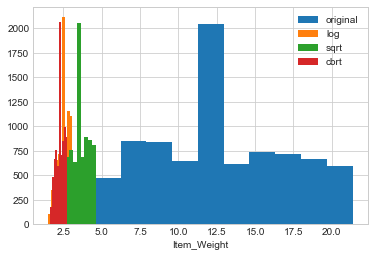

In [40]:
distribution_summary(train_df.Item_Weight,'Item_Weight',show=True)

In [41]:
train_df.Item_Visibility.nunique()

7571

## Feature Engineering

### Outlet age from Outlet_Establishment year

In [42]:
#calculate no of years of establishment
for i,dataset in enumerate(full_data):
    dataset['Outlet_age'] = 2019 - dataset['Outlet_Establishment_Year'].astype('int')
    #dataset.Outlet_age = dataset.Outlet_age.astype(object)#As it is a categorcal var
    dataset = dataset.drop(['Outlet_Establishment_Year'], axis=1)
    if i == 0:
        train_df = dataset
    else:
        test_df = dataset
    full_data = [train_df,test_df]
    dataset['Outlet_age'] = dataset['Outlet_age'].astype(object)
# change the dat type



continous_names.append('outlet_age')
# in cleaned dataframe also
df_cleaned['Outlet_age'] = 2019 - df_cleaned['Outlet_Establishment_Year'].astype('int')
df_cleaned['Outlet_age'] = df_cleaned['Outlet_age'].astype(object)
df_cleaned = df_cleaned.drop(['Outlet_Establishment_Year'], axis=1)


In [43]:
train_df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10


In [44]:
df_cleaned.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,10


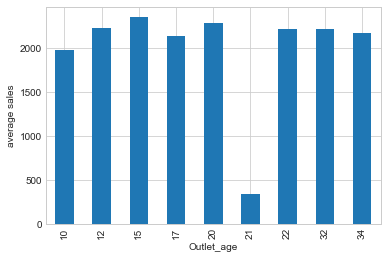

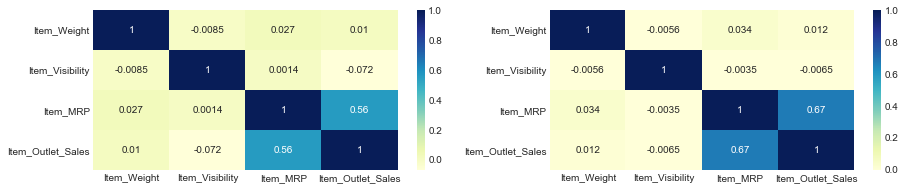

In [45]:
train_df.groupby('Outlet_age')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average sales')
plt.show()
f,ax=plt.subplots(figsize=(15,10))
pltno=321
plt.subplot(pltno)
sb.heatmap(train_df.corr(),annot=True,cmap='YlGnBu')
pltno=322
plt.subplot(pltno)
sb.heatmap(df_cleaned.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### cleaned dataframe shows more correlation with outlet age also

### Item_Visibility

In [46]:
#count Item_Visibility=0 rows --> no meaning here, so replace with median, since it is right skewed
print('Before :',len(train_df[train_df['Item_Visibility'] == 0]))
for dataset in full_data:
    zero_visibilty_items = (dataset['Item_Visibility'] == 0)
    dataset.loc[zero_visibilty_items, 'Item_Visibility'] = dataset['Item_Visibility'].median()
print('After :',len(train_df[train_df['Item_Visibility'] == 0]))

df_cleaned.loc[df_cleaned.Item_Visibility==0, 'Item_Visibility'] = df_cleaned['Item_Visibility'].median()

Before : 512
After : 0


In [47]:

pd.qcut(train_df.Item_Visibility,q=3).head()

0    (0.00257, 0.041]
1    (0.00257, 0.041]
2    (0.00257, 0.041]
3     (0.041, 0.0768]
4     (0.041, 0.0768]
Name: Item_Visibility, dtype: category
Categories (3, interval[float64]): [(0.00257, 0.041] < (0.041, 0.0768] < (0.0768, 0.196]]

#### we will make this feature to caterical(item_small, item_medium, item_large) later
- - But we have Item_Weight also, but these both have very less correlation

## Item_Weight

In [48]:
pd.qcut(train_df.Item_Weight,q=3).head()

0    (4.553999999999999, 11.0]
1    (4.553999999999999, 11.0]
2                (14.6, 21.35]
3                (14.6, 21.35]
4    (4.553999999999999, 11.0]
Name: Item_Weight, dtype: category
Categories (3, interval[float64]): [(4.553999999999999, 11.0] < (11.0, 14.6] < (14.6, 21.35]]

In [49]:
df0 = df_cleaned[df_cleaned.Item_Weight<=11]
df1 = df_cleaned[(df_cleaned.Item_Weight<=14.6)&(df_cleaned.Item_Weight>11)]
df2 = df_cleaned[(df_cleaned.Item_Weight<=21.35)&(df_cleaned.Item_Weight>14.6)]

Text(0, 0.5, 'sale')

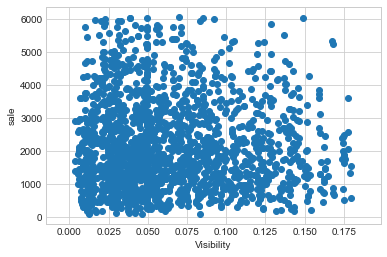

In [50]:
plt.scatter(df0.Item_Visibility,df0.Item_Outlet_Sales)
plt.xlabel('Visibility')
plt.ylabel('sale')

In [51]:
#### very less correlation b/w these

In [52]:
pd.qcut(df0.Item_Visibility,q=3).head()

0     (0.00259, 0.04]
1     (0.00259, 0.04]
3      (0.04, 0.0745]
4      (0.04, 0.0745]
11     (0.04, 0.0745]
Name: Item_Visibility, dtype: category
Categories (3, interval[float64]): [(0.00259, 0.04] < (0.04, 0.0745] < (0.0745, 0.18]]

In [53]:
pd.qcut(df1.Item_Visibility,q=3).head()

5     (0.00453, 0.0376]
6      (0.0376, 0.0705]
12    (0.00453, 0.0376]
14      (0.0705, 0.176]
16    (0.00453, 0.0376]
Name: Item_Visibility, dtype: category
Categories (3, interval[float64]): [(0.00453, 0.0376] < (0.0376, 0.0705] < (0.0705, 0.176]]

#### Even when we took small items (in df0), the visibilty goes till 0.18 where 0.19 is the maximum in the full dataset,
- Anyways let us engineer features for both and keep

In [54]:
"""full_data = [df_cleaned.copy(),test_df.copy()]
for i,data in enumerate([df_cleaned,test_df]):
    data['visiblity'] = data.Item_Visibility.apply(lambda x:'less' if x<=0.041 else 'medium' \
                                                      if (x>0.041) & (x<=0.0768) else 'more')
    data['weight'] = data.Item_Weight.apply(lambda x:'light' if x<=11 else 'medium' if (x>11) & (x<=14.6) else 'heavy')
    data = data.drop(['Item_Weight','Item_Visibility'],axis=1)
    if i ==0:
        df_cleaned = data
        #df_cleaned = df_cleaed.drop(['Item_Weight','Item_Visibility'],axis=1)
    else:
        test_df = data
cat_names.append('weight')
cat_names.append('visibility')
continous_names = [i for i in continous_names if i not in ['Item_Weight','Item_Visibility']]
cat_names,continous_names"""


"full_data = [df_cleaned.copy(),test_df.copy()]\nfor i,data in enumerate([df_cleaned,test_df]):\n    data['visiblity'] = data.Item_Visibility.apply(lambda x:'less' if x<=0.041 else 'medium'                                                       if (x>0.041) & (x<=0.0768) else 'more')\n    data['weight'] = data.Item_Weight.apply(lambda x:'light' if x<=11 else 'medium' if (x>11) & (x<=14.6) else 'heavy')\n    data = data.drop(['Item_Weight','Item_Visibility'],axis=1)\n    if i ==0:\n        df_cleaned = data\n        #df_cleaned = df_cleaed.drop(['Item_Weight','Item_Visibility'],axis=1)\n    else:\n        test_df = data\ncat_names.append('weight')\ncat_names.append('visibility')\ncontinous_names = [i for i in continous_names if i not in ['Item_Weight','Item_Visibility']]\ncat_names,continous_names"

In [55]:
# if back up needed
#df_cleaned=full_data[0].copy()
#test_df = full_data[1].copy()

In [56]:
df_cleaned.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,20


### Item_identifier

In [57]:
"""train_df = full_data[0]
df_cleaned= full_data[1]
test_df=full_data[2]"""

'train_df = full_data[0]\ndf_cleaned= full_data[1]\ntest_df=full_data[2]'

In [58]:
#full_data = [train_df.copy(),df_cleaned.copy(),test_df.copy()]
#See counts in each of the category Item_Identifier
for dataset in [train_df,df_cleaned,test_df]:
    dataset['item_identifier'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])
    dataset['item_identifier'] = dataset['item_identifier'].replace({'FD':'Food', 'NC':'Non-consumable', 'DR':'Drinks'})
    #drop the old var
    dataset.drop(['Item_Identifier'], axis =1,inplace=True)

    #dataset.loc[(dataset.Item_Type=='Dairy')&(dataset.item_identifier=='Food'),'item_identifier']='Drinks'


## Item_Fat_Content

In [59]:
#A few categories are repeat, lets replace those and remove abbreviations
full_data = [train_df.copy(),df_cleaned.copy(),test_df.copy()]

for dataset in [train_df,df_cleaned,test_df]:
    dataset['item_fat_content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
    dataset.drop(['Item_Fat_Content'], axis =1,inplace=True)

In [60]:
df_cleaned.head(1)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,item_identifier,item_fat_content
0,9.3,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,20,Food,Low Fat


item_identifier
Drinks            1981.532543
Food              2196.470109
Non-consumable    2210.789294
Name: Item_Outlet_Sales, dtype: float64


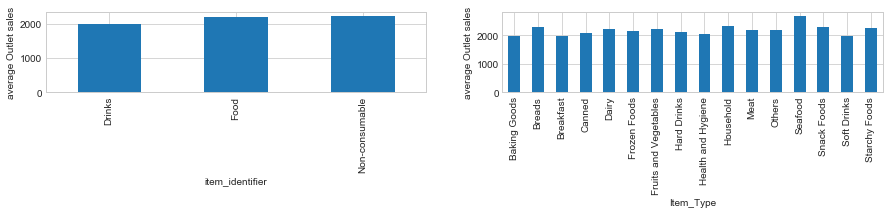

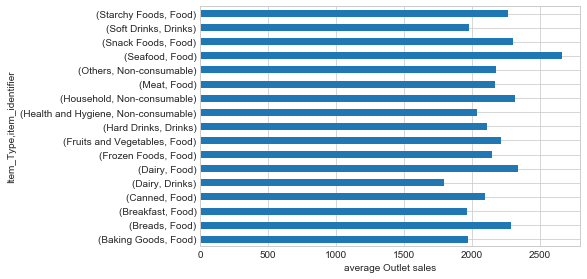

In [61]:
print(df_cleaned.groupby('item_identifier')['Item_Outlet_Sales'].mean())
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
df_cleaned.groupby('item_identifier')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
pltno=322
plt.subplot(pltno)
df_cleaned.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
f,ax=plt.subplots(figsize=(15,15))
pltno=323
plt.subplot(pltno)
df_cleaned.groupby(['Item_Type','item_identifier'])['Item_Outlet_Sales'].mean().plot.barh()
plt.xlabel('average Outlet sales')
plt.show()


#### Non consumables have more average sale price values, very closely followed by Food
- Item_Identifier seems no signifance on sales
- Even when it is Food, few items have more sales prices, depending on the food
- - Seafood has more price 

item_identifier
Drinks            1895.078959
Food              2122.003166
Non-consumable    2063.470455
Name: Item_Outlet_Sales, dtype: float64


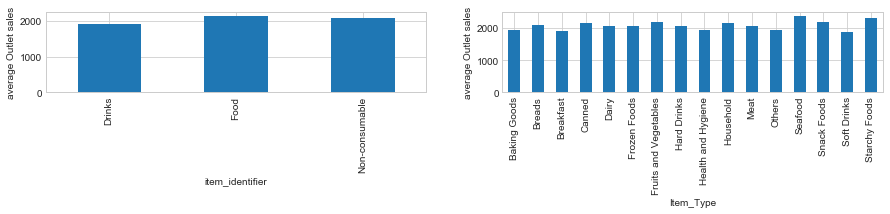

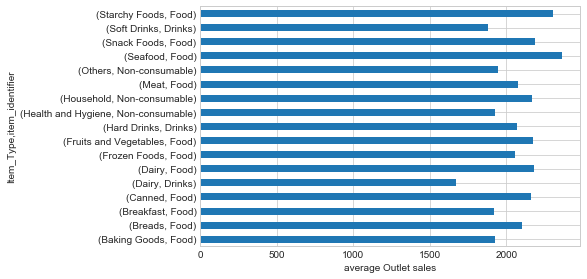

In [62]:
print(train_df.groupby('item_identifier')['Item_Outlet_Sales'].mean())
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
train_df.groupby('item_identifier')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
pltno=322
plt.subplot(pltno)
train_df.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
f,ax=plt.subplots(figsize=(15,15))
pltno=323
plt.subplot(pltno)
train_df.groupby(['Item_Type','item_identifier'])['Item_Outlet_Sales'].mean().plot.barh()
plt.xlabel('average Outlet sales')

plt.show()


#### drinks are cheaper, so they contribute less towards Outlet_Sale

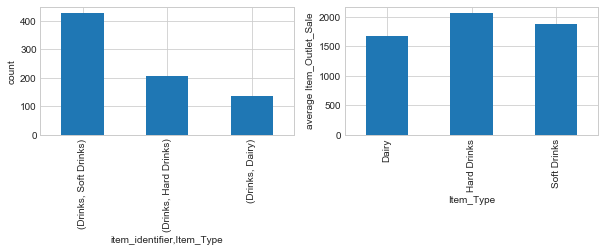

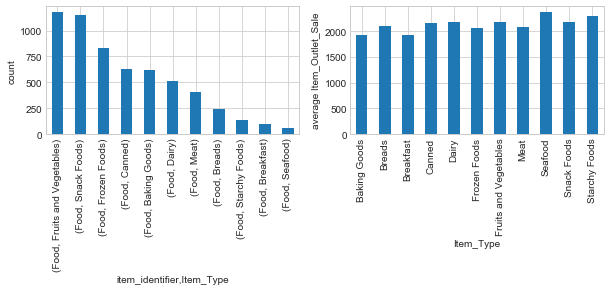

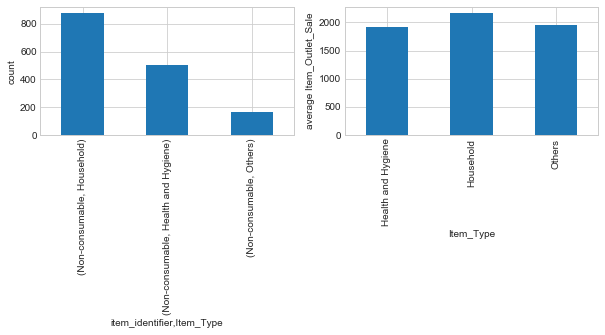

In [63]:
f,ax=plt.subplots(figsize=(10,8))
pltno=321
plt.subplot(pltno)
train_df[train_df.item_identifier=='Drinks'].groupby(['item_identifier']).Item_Type.value_counts().plot.bar()
plt.ylabel('count')
pltno=322
plt.subplot(pltno)
train_df[train_df.item_identifier=='Drinks'].groupby('Item_Type').Item_Outlet_Sales.mean().plot.bar()
plt.ylabel('average Item_Outlet_Sale')

f,ax=plt.subplots(figsize=(10,8))
pltno=323
plt.subplot(pltno)
train_df[train_df.item_identifier=='Food'].groupby(['item_identifier']).Item_Type.value_counts().plot.bar()
plt.ylabel('count')
pltno=324
plt.subplot(pltno)
train_df[train_df.item_identifier=='Food'].groupby('Item_Type').Item_Outlet_Sales.mean().plot.bar()
plt.ylabel('average Item_Outlet_Sale')

f,ax=plt.subplots(figsize=(10,8))
pltno=325
plt.subplot(pltno)
train_df[train_df.item_identifier=='Non-consumable'].groupby(['item_identifier']).Item_Type.value_counts().plot.bar()
plt.ylabel('count')
pltno=326
plt.subplot(pltno)
train_df[train_df.item_identifier=='Non-consumable'].groupby('Item_Type').Item_Outlet_Sales.mean().plot.bar()
plt.ylabel('average Item_Outlet_Sale')
plt.show()

#### which item contributes to most outlet sales?
- Instead of soft drinks sales the most, hard drinks contribute more towards outlet sales
    - least contributor is dairy
- Inside Food, starchy foods and seafood are highest contributors, despite of sale numbers being very low(since costly)
- Inside Non-consumables households contrubute the most


## add another column representing above information

In [64]:
df_cleaned.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_age', 'item_identifier',
       'item_fat_content'],
      dtype='object')

In [65]:
#A few categories are repeat, lets replace those and remove abbreviations
full_data = [train_df.copy(),df_cleaned.copy(),test_df.copy()]
#train_df = full_data[0]
#df_cleaned = full_data[1]
#test_df=full_data[2]
for dataset in [train_df,df_cleaned,test_df]:
    
    dataset['item_iden_type'] = dataset['item_identifier']+'-'+dataset['Item_Type']
    dataset.drop(['item_identifier','Item_Type'], axis =1,inplace=True)
    #print(dataset.columns)

### fat content and sales

item_fat_content
Low Fat    2059.730242
Regular    2144.415520
Name: Item_Outlet_Sales, dtype: float64


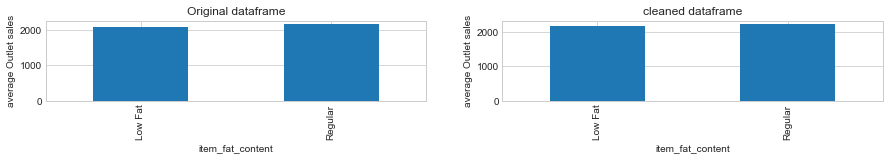

In [66]:
print(train_df.groupby('item_fat_content')['Item_Outlet_Sales'].mean())
f,ax=plt.subplots(figsize=(15,5))
pltno=321
plt.subplot(pltno)
train_df.groupby('item_fat_content')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
plt.title('Original dataframe')
pltno=322
plt.subplot(pltno)
df_cleaned.groupby('item_fat_content')['Item_Outlet_Sales'].mean().plot.bar()
plt.ylabel('average Outlet sales')
plt.title('cleaned dataframe')
"""pltno=323
plt.subplot(pltno)
df_cleaned.groupby(['Item_Type','item_identifier'])['Item_Outlet_Sales'].mean().plot.barh()
plt.xlabel('average Outlet sales')
plt.show()
"""
plt.show()

#### Regular is contributing more to sales (slight difference)

In [67]:
# add to skip list
bar_graph_skip_list.append('item_identifier')
bar_graph_skip_list

['Outlet_Identifier', 'item_identifier']

In [68]:
continous_names,cat_names
#bar_graph_skip_list=['Outlet_Identifier','item_identifier']

(['Item_Weight',
  'Item_Visibility',
  'Item_MRP',
  'Item_Outlet_Sales',
  'outlet_age'],
 ['Item_Identifier',
  'Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type',
  'Outlet_Establishment_Year'])

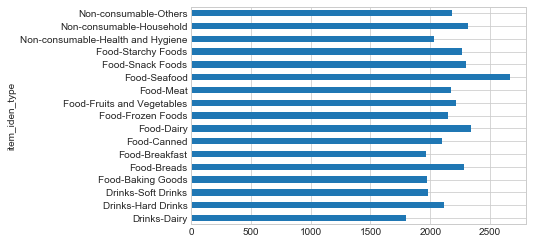

In [69]:
df_cleaned.groupby('item_iden_type')['Item_Outlet_Sales'].mean().plot.barh()

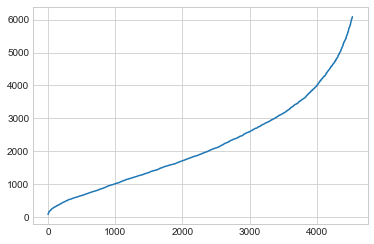

In [ ]:
t = pd.DataFrame({'actual': df_cleaned.Item_Outlet_Sales})
    
t.sort_values(by=['actual'], inplace=True)
plt.plot(t['actual'].tolist(), label='actual')


#### The outlet_sales are having a curvier rathan linear relation, linearregression wont do much good

Index(['Food-Seafood', 'Drinks-Dairy', 'Food-Frozen Foods', 'Food-Breakfast',
       'Food-Fruits and Vegetables'],
      dtype='object', name='item_iden_type')


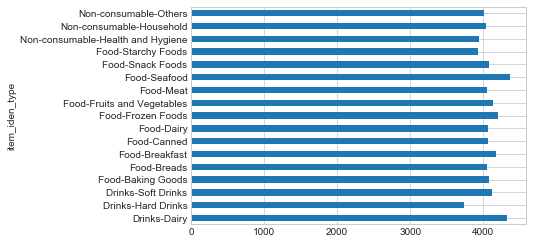

In [ ]:
print(df_cleaned[df_cleaned.Item_Outlet_Sales>3000].groupby('item_iden_type')['Item_Outlet_Sales'].mean().nlargest(5).index)
df_cleaned[df_cleaned.Item_Outlet_Sales>3000].groupby('item_iden_type')['Item_Outlet_Sales'].mean().plot.barh()

## chi-square analysis for categorical
- Hypothesis H0(NUll hypothesis) says that Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be independent of each other
- H1- says that the Relation b/w all IV variable(seperately) and dependent(outlet_sales) is said to be dependent on each other
 - if p-val>0.05 the H0 is accepted, signifiying that there is no significant relation and they are independent and hence we can drop that var
 - if p-val <0.05 H0 is rejected and H1 is accepted and we can include the var, since
 they are dependent and can explain the DV significantly

In [ ]:
df_cleaned,chi2_skip = chi_sq_analysis(df_cleaned,df_cleaned.drop(['Item_MRP', 'Item_Outlet_Sales'],axis=1).\
                                  columns,'Item_Outlet_Sales',drop=False)
#test = chi_sq_analysis1(test,['time','passenger_count'])


Suggest to skip col below---------------------
accept -pvalue 0.000000 Item_Weight
skip -p value 0.928795 Item_Visibility
skip -p value 0.769010 Outlet_Identifier
skip -p value 0.642861 Outlet_Size
skip -p value 0.527197 Outlet_Location_Type
skip -p value 0.421160 Outlet_Type
skip -p value 0.769010 Outlet_age
skip -p value 0.114798 item_fat_content
accept -pvalue 0.000000 item_iden_type


In [ ]:
train_df,chi2_skip_orig = chi_sq_analysis(train_df,train_df.drop(['Item_MRP', 'Item_Outlet_Sales'],axis=1).\
                                  columns,'Item_Outlet_Sales',drop=False)

Suggest to skip col below---------------------
accept -pvalue 0.000000 Item_Weight
accept -pvalue 0.000224 Item_Visibility
accept -pvalue 0.000000 Outlet_Identifier
skip -p value 0.518309 Outlet_Size
accept -pvalue 0.043372 Outlet_Location_Type
accept -pvalue 0.000000 Outlet_Type
accept -pvalue 0.000000 Outlet_age
accept -pvalue 0.000104 item_fat_content
accept -pvalue 0.000000 item_iden_type


In [ ]:
df_cleaned.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.012252,0.034062,0.012206
Item_Visibility,-0.012252,1.000000,-0.005641,-0.007154
Item_MRP,0.034062,-0.005641,1.000000,0.673963
Item_Outlet_Sales,0.012206,-0.007154,0.673963,1.000000


In [ ]:
df_cleaned.item_fat_content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
model_clean = df_cleaned.copy()#.drop(chi2_skip,axis=1)
#model_clean = df_cleaned[['Item_Type','item_identifier','Item_MRP','Item_Outlet_Sales']]
model_chi2 = df_cleaned.copy().drop(chi2_skip,axis=1)
model_orig = train_df.copy().drop(chi2_skip_orig,axis=1)
#model_orig = train_df[['Item_Type','item_identifier','Item_MRP','Item_Outlet_Sales']]

In [ ]:
model_orig.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,item_fat_content,item_iden_type
0,9.3,0.016047,249.8092,OUT049,Tier 1,Supermarket Type1,3735.138,20,Low Fat,Food-Dairy


In [ ]:
model_chi2.head(1)

,Item_Weight,Item_MRP,Item_Outlet_Sales,item_iden_type
0,9.3,249.8092,3735.138,Food-Dairy


In [ ]:
model_clean.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,item_fat_content,item_iden_type
0,9.3,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,20,Low Fat,Food-Dairy


## Normalization/Standardization
In case of Item_Weight, its almost uniformly distributed  
Rest others are skewed, so using normalization.
used only for continous data, except the Target Variable/Dep Var

---------------original---------------
Skewness :  0.7294268251399808
+++++very Right/positive(tail/majority towards right) skewed
Kurtosis :  -0.16480814666923305
%%%%%%%%%Moderately Bell shaped
---------------log---------------
Skewness :  -0.7159425422365701
+++++very Left/negative(tail/majority towards left) skewed
Kurtosis :  0.3339892296734672
%%%%%%%%%Moderately Bell shaped
---------------sqrt---------------
Skewness :  0.11103338890597078
%%%%%Moderately symm
Kurtosis :  -0.6834028712158449
~~~~~~~~~~Pointy
---------------cbrt---------------
Skewness :  -0.13148518220874822
%%%%%Moderately symm
Kurtosis :  -0.5991417632853779
~~~~~~~~~~Pointy


No handles with labels found to put in legend.


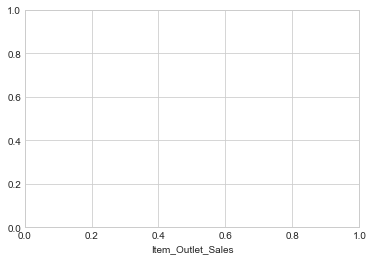

In [ ]:
distribution_summary(df_cleaned.Item_Outlet_Sales,'Item_Outlet_Sales')

In [ ]:
model_orig = normalize(model_orig,['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
model_clean = normalize(model_clean,['Item_MRP','Item_Weight','Item_Visibility','Item_Outlet_Sales'])
model_chi2 = normalize(model_chi2,['Item_MRP','Item_Outlet_Sales'])
model_transform = df_cleaned.copy()
model_transform.Item_Outlet_Sales = np.log(model_transform.Item_Outlet_Sales)


In [ ]:
df_cleaned.to_csv(processed_data_path,index=False)
#train_df = pd.read_csv(processed_data_path)
#train_df.head(2)

## categorical var to dummy variables

In [ ]:
model_orig = pd.get_dummies(model_orig,drop_first=0)
model_clean = pd.get_dummies(model_clean,drop_first=0)
model_chi2 = pd.get_dummies(model_chi2,drop_first=0)
model_transform = pd.get_dummies(model_transform,drop_first=0)


In [ ]:
model_orig.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,...,item_iden_type_Food-Dairy,item_iden_type_Food-Frozen Foods,item_iden_type_Food-Fruits and Vegetables,item_iden_type_Food-Meat,item_iden_type_Food-Seafood,item_iden_type_Food-Snack Foods,item_iden_type_Food-Starchy Foods,item_iden_type_Non-consumable-Health and Hygiene,item_iden_type_Non-consumable-Household,item_iden_type_Non-consumable-Others
0,0.282525,0.064912,0.927507,0.57438,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train_df.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_age,item_fat_content,item_iden_type
0,9.3,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.138,20,Low Fat,Food-Dairy


In [ ]:
## get the tuned paramters
SEED =0
NFOLDS=5
rf_params={}

#rf_params = {
#    'n_estimators': 1000,
#   'max_features':'auto'
#}



-------------------------------KNN neighbors tuning---------------
rmse error for k 1 is 0.2263922425077802
rmse error for k 2 is 0.19910539480503872
rmse error for k 3 is 0.18872222490260632
rmse error for k 4 is 0.18287454796533845
rmse error for k 5 is 0.18099397455789426
rmse error for k 6 is 0.17881893988268527
rmse error for k 7 is 0.17750654412107372
rmse error for k 8 is 0.17733004793179033
rmse error for k 9 is 0.17814796856394483
rmse error for k 10 is 0.17907813225323538
rmse error for k 11 is 0.1786485296611896
rmse error for k 12 is 0.17876665102079972
rmse error for k 13 is 0.17907496865271463
rmse error for k 14 is 0.1794823273604586
{1: 0.2263922425077802, 2: 0.19910539480503872, 3: 0.18872222490260632, 4: 0.18287454796533845, 5: 0.18099397455789426, 6: 0.17881893988268527, 7: 0.17750654412107372, 8: 0.17733004793179033, 9: 0.17814796856394483, 10: 0.17907813225323538, 11: 0.1786485296611896, 12: 0.17876665102079972, 13: 0.17907496865271463, 14: 0.1794823273604586}


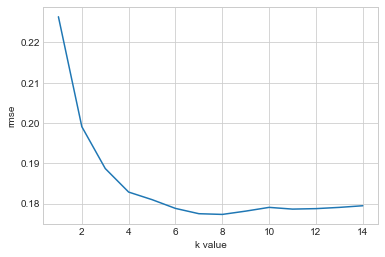

In [ ]:
iv = model_orig.drop('Item_Outlet_Sales',axis=1)
dv = model_orig['Item_Outlet_Sales']
knn_params={}
knn_params = knn_k_tuning(iv,dv,knn_params)

In [ ]:
vif = pd.DataFrame()
predictors = model_orig[['Item_MRP',#'Outlet_Size_Small',  
       'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT035',
        'item_fat_content_Regular',
        'Outlet_age_32',
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]]
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,1.954856,Item_MRP
1,1.898849,Outlet_Location_Type_Tier 3
2,1.150046,Outlet_Identifier_OUT035
3,1.487154,item_fat_content_Regular
4,1.409339,Outlet_age_32
5,1.008644,item_iden_type_Food-Seafood
6,1.126743,item_iden_type_Food-Frozen Foods
7,1.092833,item_iden_type_Food-Dairy
8,1.022365,item_iden_type_Food-Starchy Foods
9,1.036667,item_iden_type_Food-Breads


In [ ]:
vif = pd.DataFrame()
predictors = model_chi2[['Item_MRP',#'Outlet_Size_Small',  
       
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]]
vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

,VIF,features
0,1.278072,Item_MRP
1,1.007476,item_iden_type_Food-Seafood
2,1.097308,item_iden_type_Food-Frozen Foods
3,1.080341,item_iden_type_Food-Dairy
4,1.020479,item_iden_type_Food-Starchy Foods
5,1.027000,item_iden_type_Food-Breads
6,1.045467,item_iden_type_Food-Meat


In [ ]:

lr = sklearnHelper(clf = LinearRegression, seed = SEED,params= None)
knn = sklearnHelper(clf=KNeighborsRegressor, seed=SEED, params=knn_params)

-------------------------
linearRegression--------
-------------------------
model score : 0.5488622958495529
rmse : 0.15942716692011152
model score : 0.5468708148713506
rmse : 0.15581729483077308
model score : 0.5290571865207994
rmse : 0.15607804393778546
model score : 0.5482700092811663
rmse : 0.1564399525563481
model score : 0.5566036061409064
rmse : 0.15683173638645345
++++++++++ Average lr score : 0.5459327825327551, Average lr rmse score : 0.15691883892629432
--------------------random forest pramaeter tuning------------------


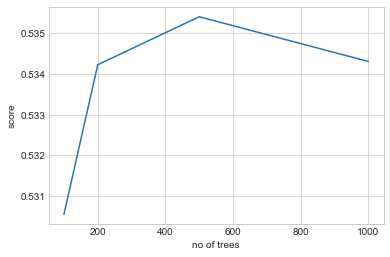

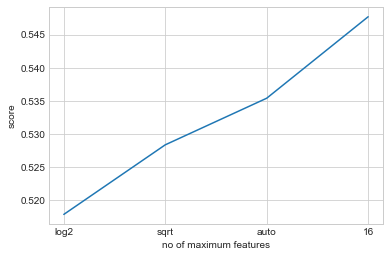

-------------------------
RandomForestRegressor-----
-------------------------
model score : 0.5557521240543861
rmse : 0.1582050877894864
model score : 0.5382935582152939
rmse : 0.1572851097174924
model score : 0.5254419424944716
rmse : 0.1566759737025237
model score : 0.5430568239107945
rmse : 0.15734005992774147
model score : 0.5644063272116059
rmse : 0.15544567887376337
++++++++ Average rf score : 0.5453901551773104, Average rf rmse score : 0.15699038200220147


In [ ]:
#iv = model_orig.drop(['Item_Outlet_Sales'],axis=1).values

iv = model_orig.drop('Item_Outlet_Sales',axis=1).values
dv = model_orig['Item_Outlet_Sales']

print('-------------------------')
print('linearRegression--------')
print('-------------------------')
lr_avg_score, lr_auc_score,lr_rmse_score,logger= get_score(model_orig, lr, iv, dv,regression=True)
print('++++++++++ Average lr score : %s, Average lr rmse score : %s'%(lr_avg_score,lr_rmse_score))

iv = model_orig.drop('Item_Outlet_Sales',axis=1).values
rf_params = rf_hyperparameter_tuning(iv,dv,rf_params)
rf = sklearnHelper(clf = RandomForestRegressor, seed = SEED,params = rf_params)

print('-------------------------')
print('RandomForestRegressor-----')
print('-------------------------')
rf_avg_score,rf_auc_score,rf_rmse_score,logger = get_score(model_orig, rf, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( rf_avg_score,rf_rmse_score))

In [ ]:
train_df.groupby('item_iden_type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

item_iden_type
Food-Seafood                         2364.522120
Food-Starchy Foods                   2301.498163
Food-Snack Foods                     2183.237819
Food-Dairy                           2182.744676
Food-Fruits and Vegetables           2173.400122
Non-consumable-Household             2163.842408
Food-Canned                          2157.439814
Food-Breads                          2101.077716
Food-Meat                            2073.109111
Drinks-Hard Drinks                   2070.075126
Food-Frozen Foods                    2055.578887
Non-consumable-Others                1947.664341
Non-consumable-Health and Hygiene    1927.993961
Food-Baking Goods                    1924.092423
Food-Breakfast                       1918.578509
Drinks-Soft Drinks                   1881.866588
Drinks-Dairy                         1671.945296
Name: Item_Outlet_Sales, dtype: float64

accuracy -66.05727002786088
model score : 0.5453245584999246
model r2 score 0.5453245584999246
test: rmse 0.1597331402297951
train:rmse 0.155364713714927
%%%%%%%%%%Good model
Index(['Item_MRP', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_age_17', 'Outlet_age_32', 'item_iden_type_Drinks-Dairy',
       'item_iden_type_Drinks-Soft Drinks', 'item_iden_type_Food-Breakfast',
       'item_iden_type_Food-Dairy', 'item_iden_type_Food-Seafood'],
      dtype='object') [ 0.51450855 -0.45677281 -0.15817921 -0.20072052 -0.02005318 -0.00966184
 -0.01420652 -0.01055648 -0.01540466 -0.01160219  0.02693255]
LR R2 score : 0.5453245584999246
Adjusted R2 Score : 0.544713211493873
+++++++++accuracy : -66.05727002786088
----------MAPE : %s 166.05727002786088
---------RMSE %s 0.1597331402297951


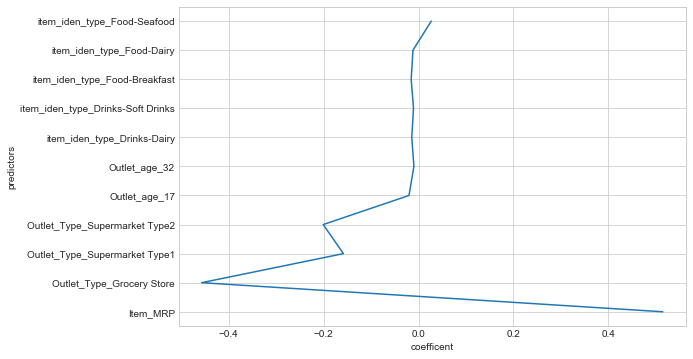

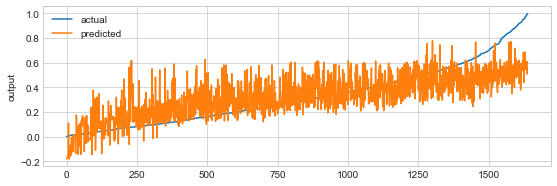

In [ ]:
iv = model_orig.drop('Item_Outlet_Sales',axis=1)
iv = model_orig[[#'Item_Weight', 'Item_Visibility', 
                 'Item_MRP',
       
        'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1','Outlet_Type_Supermarket Type2',
       #'Outlet_Type_Supermarket Type3', 
        'Outlet_age_17',
       'Outlet_age_32', 
       'item_iden_type_Drinks-Dairy', #'item_iden_type_Drinks-Hard Drinks',
       'item_iden_type_Drinks-Soft Drinks', #'item_iden_type_Food-Baking Goods',
    #   'item_iden_type_Food-Breads', 
    'item_iden_type_Food-Breakfast',
       #'item_iden_type_Food-Canned', 
    'item_iden_type_Food-Dairy',
       #'item_iden_type_Food-Frozen Foods',
       #'item_iden_type_Food-Fruits and Vegetables', 'item_iden_type_Food-Meat',
       'item_iden_type_Food-Seafood',# 'item_iden_type_Food-Snack Foods',
       #'item_iden_type_Food-Starchy Foods',
       #'item_iden_type_Non-consumable-Health and Hygiene',
       #'item_iden_type_Non-consumable-Household',
       #'item_iden_type_Non-consumable-Others'
    ]]
dv = model_orig['Item_Outlet_Sales']
plot_lr_coef(iv,dv)

accuracy  0.5476843000230878


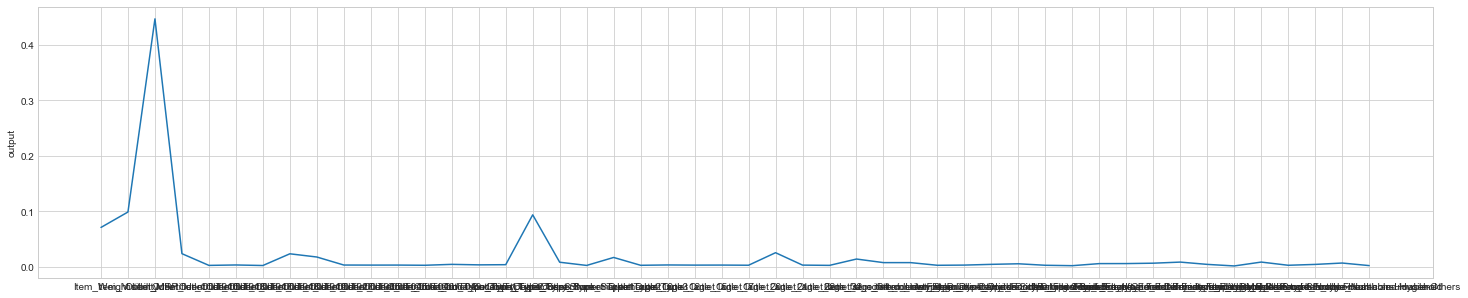

In [ ]:
iv = model_orig.drop('Item_Outlet_Sales',axis=1)
dv = model_orig['Item_Outlet_Sales']

plot_rf_feature_importance(iv,dv,rf_params)

--------------------random forest pramaeter tuning------------------


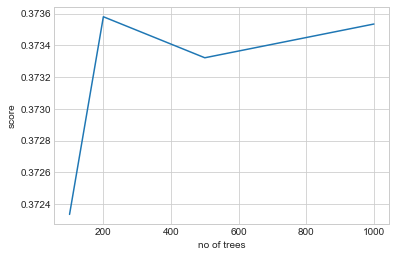

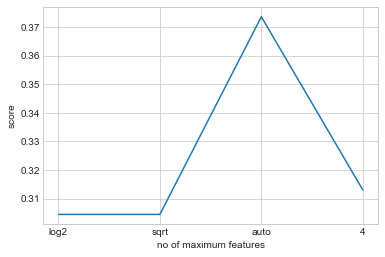

-------------------------
linearRegression--------
-------------------------
model score : 0.44768195009841727
rmse : 0.16778575994958808
model score : 0.4417189940841316
rmse : 0.1678701394289749
model score : 0.4625365490236982
rmse : 0.16161372610488836
model score : 0.4804922740983676
rmse : 0.1658361375803747
model score : 0.4646768513780316
rmse : 0.16483216191592717
++++++++++ Average lr score : 0.4594213237365293, Average lr rmse score : 0.16558758499595064
-------------------------
RandomForestRegressor-----
-------------------------
model score : 0.38714027245636
rmse : 0.17674251191793652
model score : 0.38244861578253675
rmse : 0.17655644463132783
model score : 0.3783506155252484
rmse : 0.1738107081980597
model score : 0.41802403933627275
rmse : 0.17552367038372624
model score : 0.4033905746276838
rmse : 0.1740119196449666
++++++++ Average rf score : 0.39387082354562036, Average rf rmse score : 0.17532905095520337


"\nprint('-------------------------')\nprint('KNN ------------------------')\nprint('-------------------------')\nknn_avg_score,knn_auc_score,knn_rmse_score,logger = get_score(model_orig, knn, iv, dv,regression=True)\nprint('++++++++ Average rf score : %s, Average rf rmse score : %s'%( knn_avg_score,knn_rmse_score))\n"

In [ ]:

#iv = model_orig.drop(['Item_Outlet_Sales','Item_Type'],axis=1).values
iv=model_clean[['Item_MRP','Outlet_Size_Small',  
       'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT035',
        'item_fat_content_Regular',
        'Outlet_age_32',
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]].values
dv = model_clean['Item_Outlet_Sales']
rf_params = rf_hyperparameter_tuning(iv,dv,rf_params)
rf = sklearnHelper(clf = RandomForestRegressor, seed = SEED,params = rf_params)

print('-------------------------')
print('linearRegression--------')
print('-------------------------')
lr_avg_score, lr_auc_score,lr_rmse_score,logger= get_score(model_clean, lr, iv, dv,regression=True)
print('++++++++++ Average lr score : %s, Average lr rmse score : %s'%(lr_avg_score,lr_rmse_score))


iv = model_clean.drop('Item_Outlet_Sales',axis=1).values
print('-------------------------')
print('RandomForestRegressor-----')
print('-------------------------')
rf_avg_score,rf_auc_score,rf_rmse_score,logger = get_score(model_clean, rf, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( rf_avg_score,rf_rmse_score))
"""
print('-------------------------')
print('KNN ------------------------')
print('-------------------------')
knn_avg_score,knn_auc_score,knn_rmse_score,logger = get_score(model_orig, knn, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( knn_avg_score,knn_rmse_score))
"""



In [ ]:
df_cleaned.groupby('item_iden_type')['Item_Outlet_Sales'].mean()

item_iden_type
Drinks-Dairy                         1795.506425
Drinks-Hard Drinks                   2114.271261
Drinks-Soft Drinks                   1981.258618
Food-Baking Goods                    1974.325442
Food-Breads                          2285.536563
Food-Breakfast                       1966.833727
Food-Canned                          2094.226891
Food-Dairy                           2338.677399
Food-Frozen Foods                    2147.656438
Food-Fruits and Vegetables           2214.727708
Food-Meat                            2172.833698
Food-Seafood                         2665.946425
Food-Snack Foods                     2301.202573
Food-Starchy Foods                   2263.423198
Non-consumable-Health and Hygiene    2034.755786
Non-consumable-Household             2315.957041
Non-consumable-Others                2178.401429
Name: Item_Outlet_Sales, dtype: float64

accuracy 32.0429644517822
model score : 0.4666758796213357
model r2 score 0.4666758796213357
test: rmse 0.16756005643636018
train:rmse 0.16429520396887115
%%%%%%%%%%Good model
Index(['Item_MRP', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT035', 'item_fat_content_Regular', 'Outlet_age_32',
       'item_iden_type_Food-Seafood', 'item_iden_type_Food-Frozen Foods',
       'item_iden_type_Food-Dairy', 'item_iden_type_Food-Starchy Foods',
       'item_iden_type_Food-Breads', 'item_iden_type_Food-Meat'],
      dtype='object') [ 5.79561148e-01 -1.31809711e-02 -5.36635333e-02  2.35243405e-02
  4.04251989e-03  4.41882533e-02  5.57394446e-02 -1.02310326e-03
 -8.83439325e-03 -2.08674622e-05  3.76638970e-03 -2.74054797e-03]
LR R2 score : 0.4666758796213357
Adjusted R2 Score : 0.46525872075407604
+++++++++accuracy : 32.0429644517822
----------MAPE : %s 67.9570355482178
---------RMSE %s 0.16756005643636018


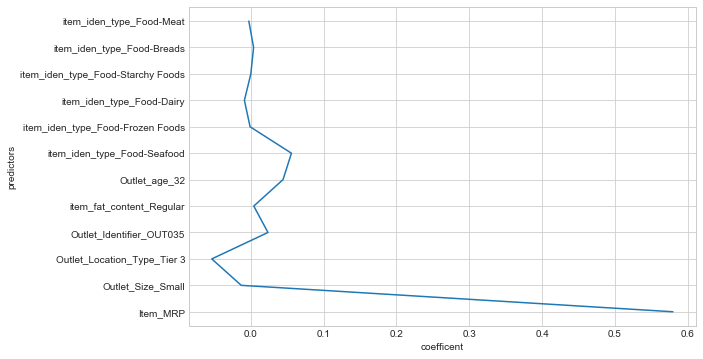

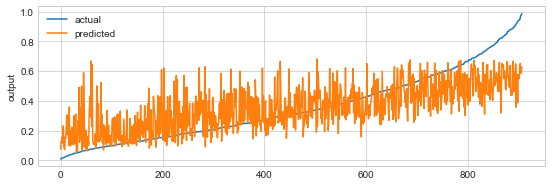

In [ ]:
#iv = model_orig.drop(['Item_Outlet_Sales','Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3','Outlet_age'],axis=1)
#iv=model_orig[['Item_MRP','Outlet_Type_Supermarket Type2','Outlet_Type_Supermarket Type1','Outlet_Size_Small','Outlet_Size_Medium','Outlet_Size_Medium','Outlet_Location_Type_Tier 3','visiblity_medium',\
#iv = model_orig[abs(model_orig.corr()['Item_Outlet_Sales']).nlargest(10)[1:].index]
iv = model_clean.drop('Item_Outlet_Sales',axis=1)
iv=model_clean[['Item_MRP','Outlet_Size_Small',  
       'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT035',
        'item_fat_content_Regular',
        'Outlet_age_32',
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]]#gives 0.4652249135876071
#iv = model_clean[['item_iden_type_Drinks-Dairy','Item_MRP']]
#iv=model_clean[['Item_MRP']] gives 0.4564 adj r2
dv = model_clean['Item_Outlet_Sales']
plot_lr_coef(iv,dv)

--------------------random forest pramaeter tuning------------------


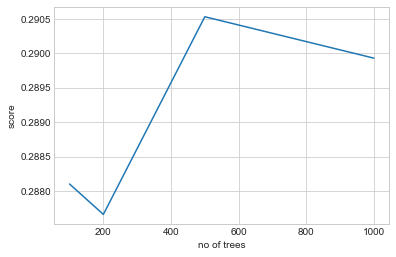

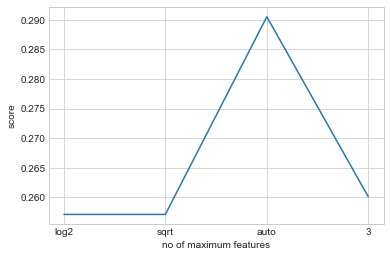

-------------------------
linearRegression--------
-------------------------
model score : 0.4365573275292174
rmse : 0.16946708092461446
model score : 0.43937105379660596
rmse : 0.16822277144954617
model score : 0.45332501228707683
rmse : 0.16299278372889156
model score : 0.47608890493445877
rmse : 0.1665374715933963
model score : 0.45449265951799506
rmse : 0.1663926898385736
++++++++++ Average lr score : 0.45196699161307086, Average lr rmse score : 0.1667225595070044
-------------------------
RandomForestRegressor-----
-------------------------
model score : 0.2805581453336389
rmse : 0.1914953934254867
model score : 0.2427381651015732
rmse : 0.19551048798550896
model score : 0.15536738727249333
rmse : 0.20259918700194784
model score : 0.27613619378289644
rmse : 0.1957544304008603
model score : 0.2617994381031682
rmse : 0.19356245809525288
++++++++ Average rf score : 0.243319865918754, Average rf rmse score : 0.1957843913818113
-------------------------
KNN ------------------------
---

In [ ]:
iv =  model_chi2[['Item_MRP',#'Outlet_Size_Small',  
       
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]].values
dv = model_chi2['Item_Outlet_Sales']
rf_params = rf_hyperparameter_tuning(iv,dv,rf_params)
rf = sklearnHelper(clf = RandomForestRegressor, seed = SEED,params = rf_params)

print('-------------------------')
print('linearRegression--------')
print('-------------------------')
lr_avg_score, lr_auc_score,lr_rmse_score,logger= get_score(model_chi2, lr, iv, dv,regression=True)
print('++++++++++ Average lr score : %s, Average lr rmse score : %s'%(lr_avg_score,lr_rmse_score))

print('-------------------------')
print('RandomForestRegressor-----')
print('-------------------------')
rf_avg_score,rf_auc_score,rf_rmse_score,logger = get_score(model_chi2, rf, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( rf_avg_score,rf_rmse_score))

print('-------------------------')
print('KNN ------------------------')
print('-------------------------')
knn_avg_score,knn_auc_score,knn_rmse_score,logger = get_score(model_chi2, knn, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( knn_avg_score,knn_rmse_score))




In [ ]:
iv=model_transform[['Item_MRP','Outlet_Size_Small',  
       'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT035',
        'item_fat_content_Regular',
        'Outlet_age_32',
        'item_iden_type_Food-Seafood', 
        'item_iden_type_Food-Frozen Foods',
        'item_iden_type_Food-Dairy',
        'item_iden_type_Food-Starchy Foods',
        'item_iden_type_Food-Breads',
        'item_iden_type_Food-Meat',   
       ]].values
#iv = model_transform.drop(['Item_Outlet_Sales'],axis=1).values
dv = model_transform['Item_Outlet_Sales']

print('-------------------------')
print('linearRegression--------')
print('-------------------------')
lr_avg_score, lr_auc_score,lr_rmse_score,logger= get_score(model_transform, lr, iv, dv,regression=True)
print('++++++++++ Average lr score : %s, Average lr rmse score : %s'%(lr_avg_score,lr_rmse_score))


print('-------------------------')
print('RandomForestRegressor-----')
print('-------------------------')
rf_avg_score,rf_auc_score,rf_rmse_score,logger = get_score(model_transform, rf, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( rf_avg_score,rf_rmse_score))

print('-------------------------')
print('KNN ------------------------')
print('-------------------------')
knn_avg_score,knn_auc_score,knn_rmse_score,logger = get_score(model_transform, knn, iv, dv,regression=True)
print('++++++++ Average rf score : %s, Average rf rmse score : %s'%( knn_avg_score,knn_rmse_score))




-------------------------
linearRegression--------
-------------------------
model score : 0.4484100734636285
rmse : 0.5592215312063415
model score : 0.4365864785537471
rmse : 0.5637301912725244
model score : 0.45600920052870086
rmse : 0.5420259922859588
model score : 0.489628657493005
rmse : 0.5285916444791644
model score : 0.4621945707461744
rmse : 0.5376399186225757
++++++++++ Average lr score : 0.45856579615705123, Average lr rmse score : 0.5462418555733131
-------------------------
RandomForestRegressor-----
-------------------------
